In [1]:
from strategiesavg import *
from data import *
import matplotlib.pyplot as plt

In [4]:
# Raw
d0 = get_hf_data()
# Outliers
d1 = get_hf_data(filter_outliers=True)
# Scaling
d2 = get_hf_data(scaling='z-score')
d3 = get_hf_data(scaling='minmax')
# Outliers and scaling
d4 = get_hf_data(filter_outliers=True, scaling='z-score')
d5 = get_hf_data(filter_outliers=True, scaling='minmax')

# dfs = [d0,d1,d2,d3,d4,d5]
dfs = [d0,d1]
balancings = [None, 'undersample', 'oversample', 'smote']

100%|██████████| 180/180 [00:32<00:00,  5.59it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: None
Accuracy: 0.80
Params: (5, 0.1, 5)


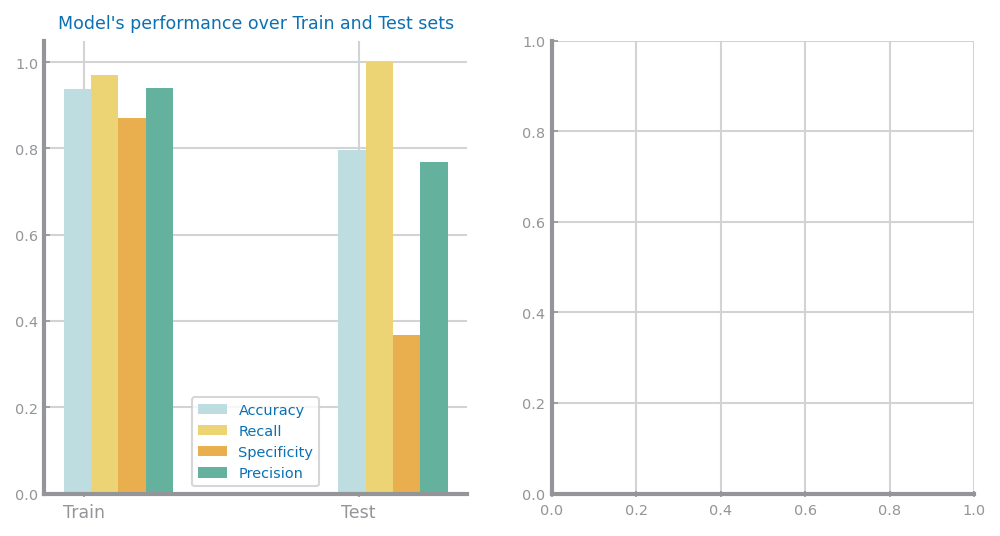

  2%|▏         | 4/180 [00:00<00:05, 30.21it/s]

Results: {'Accuracy': [0.9375, 0.7966101694915254], 'Recall': [0.9693251533742331, 1.0], 'Specificity': [0.8701298701298701, 0.3684210526315789], 'Precision': [0.9404761904761905, 0.7692307692307693]}

------




100%|██████████| 180/180 [00:30<00:00,  5.92it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: undersample
Accuracy: 0.80
Params: (25, 1, 5)


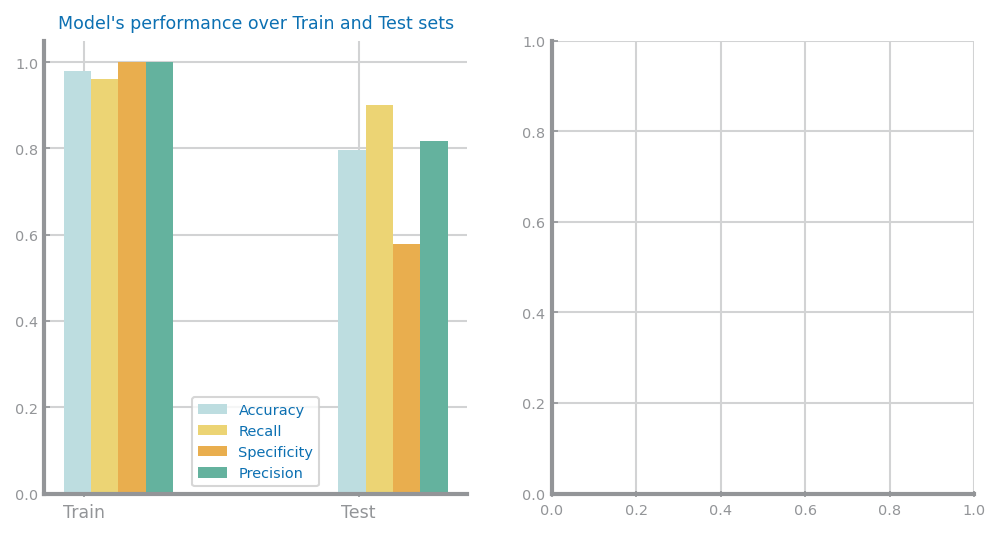

  2%|▏         | 4/180 [00:00<00:06, 28.39it/s]

Results: {'Accuracy': [0.9805194805194806, 0.7966101694915254], 'Recall': [0.961038961038961, 0.9], 'Specificity': [1.0, 0.5789473684210527], 'Precision': [1.0, 0.8181818181818182]}

------




100%|██████████| 180/180 [00:33<00:00,  5.36it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: oversample
Accuracy: 0.76
Params: (5, 0.1, 25)


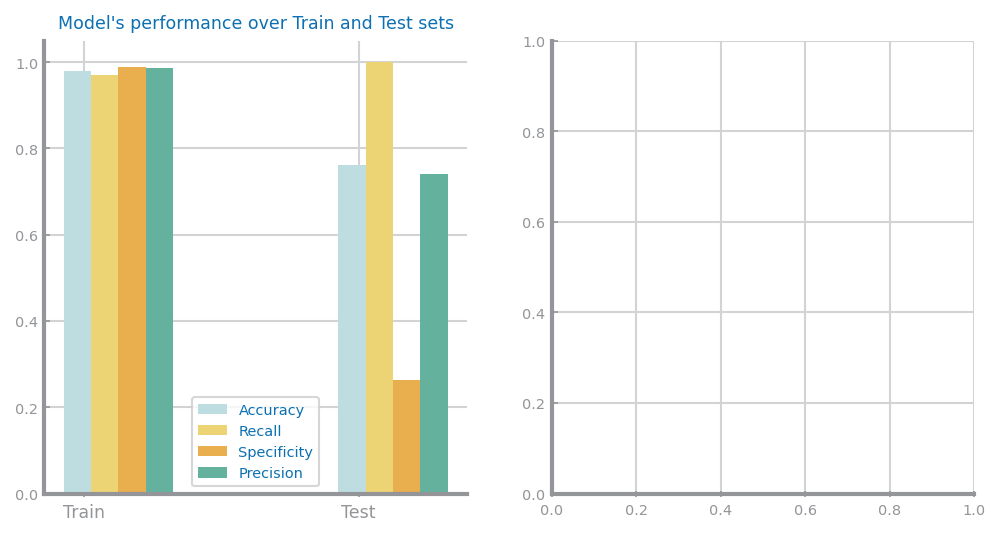

  2%|▏         | 4/180 [00:00<00:08, 21.03it/s]

Results: {'Accuracy': [0.9785276073619632, 0.7627118644067796], 'Recall': [0.9693251533742331, 1.0], 'Specificity': [0.9877300613496932, 0.2631578947368421], 'Precision': [0.9875, 0.7407407407407407]}

------




100%|██████████| 180/180 [00:36<00:00,  4.89it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: smote
Accuracy: 0.78
Params: (5, 1, 50)


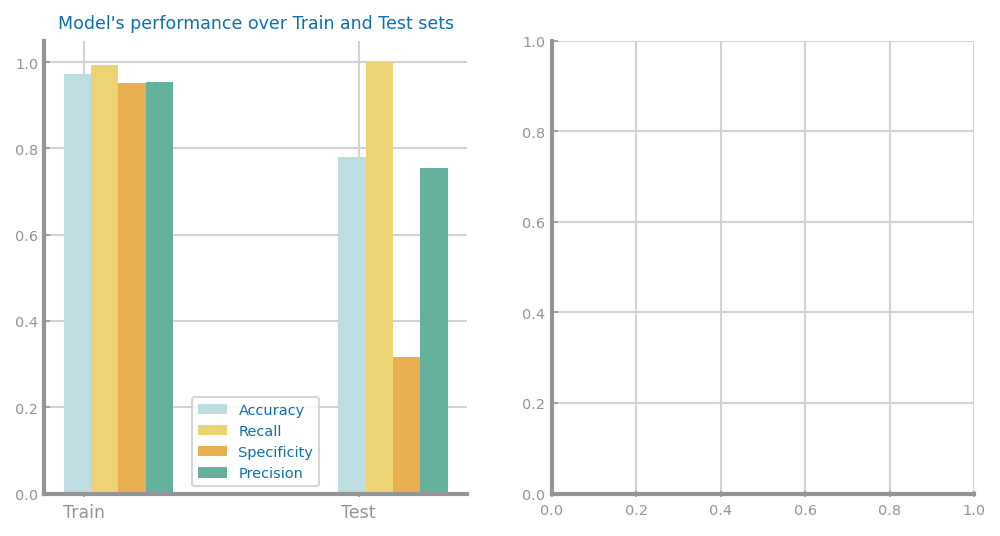

  2%|▏         | 4/180 [00:00<00:05, 30.12it/s]

Results: {'Accuracy': [0.9723926380368099, 0.7796610169491526], 'Recall': [0.9938650306748467, 1.0], 'Specificity': [0.950920245398773, 0.3157894736842105], 'Precision': [0.9529411764705882, 0.7547169811320755]}

------




100%|██████████| 180/180 [00:35<00:00,  5.04it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: None
Accuracy: 0.79
Params: (5, 1, 5)


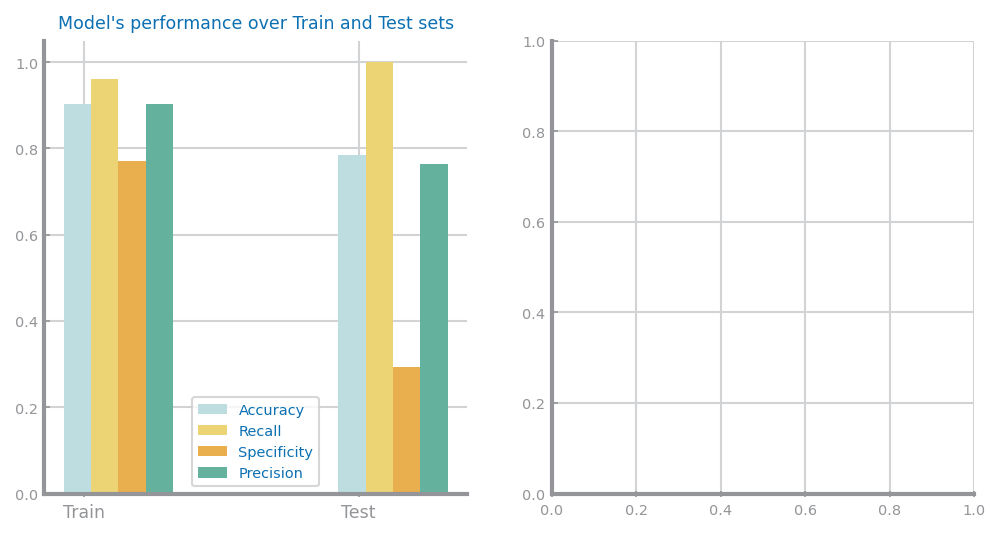

  2%|▏         | 4/180 [00:00<00:06, 27.07it/s]

Results: {'Accuracy': [0.9030837004405287, 0.7857142857142857], 'Recall': [0.9617834394904459, 1.0], 'Specificity': [0.7714285714285715, 0.29411764705882354], 'Precision': [0.9041916167664671, 0.7647058823529411]}

------




100%|██████████| 180/180 [00:34<00:00,  5.15it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: undersample
Accuracy: 0.82
Params: (5, 0.1, 150)


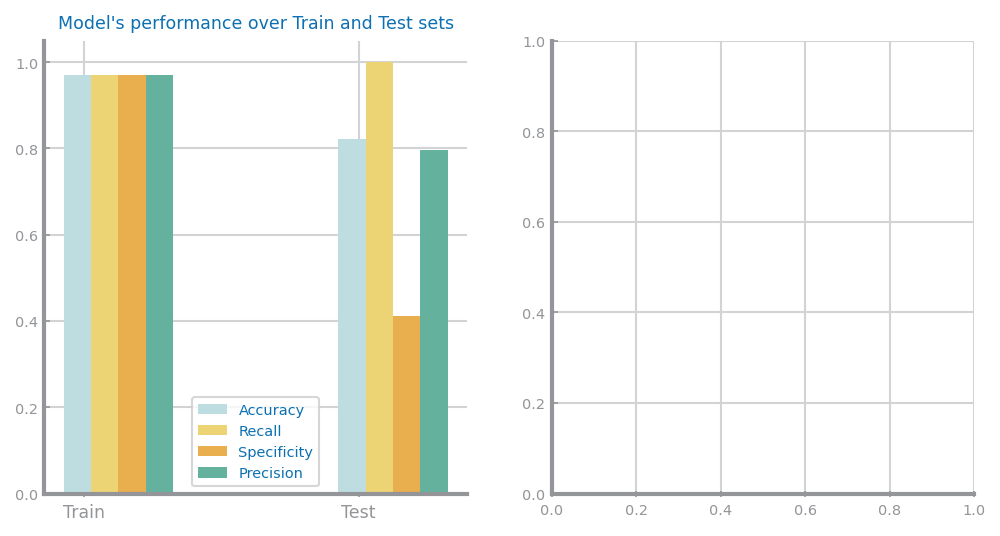

  2%|▏         | 3/180 [00:00<00:06, 26.78it/s]

Results: {'Accuracy': [0.9714285714285714, 0.8214285714285714], 'Recall': [0.9714285714285714, 1.0], 'Specificity': [0.9714285714285714, 0.4117647058823529], 'Precision': [0.9714285714285714, 0.7959183673469388]}

------




100%|██████████| 180/180 [00:36<00:00,  4.90it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: oversample
Accuracy: 0.77
Params: (5, 0.1, 5)


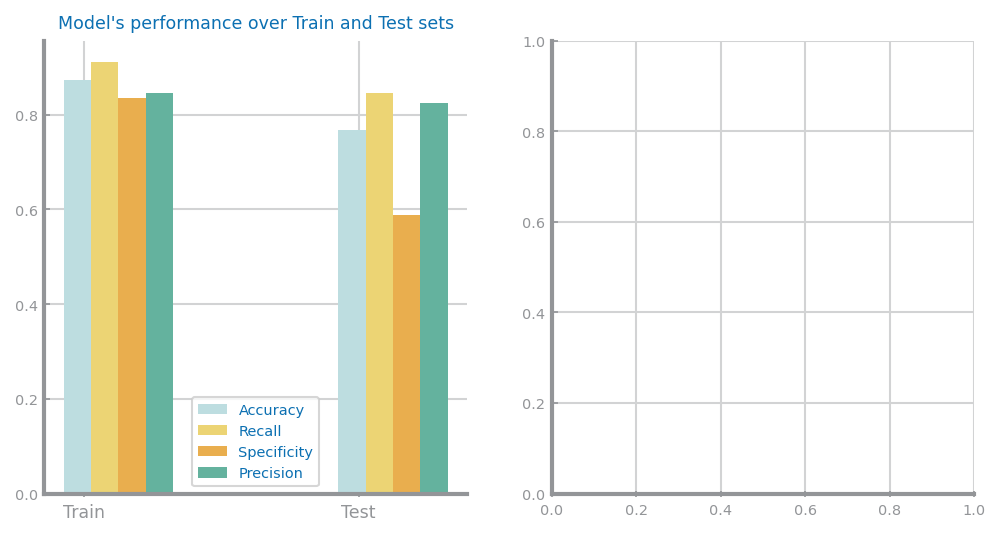

  2%|▏         | 3/180 [00:00<00:06, 27.66it/s]

Results: {'Accuracy': [0.8726114649681529, 0.7678571428571429], 'Recall': [0.910828025477707, 0.8461538461538461], 'Specificity': [0.8343949044585988, 0.5882352941176471], 'Precision': [0.8461538461538461, 0.825]}

------




100%|██████████| 180/180 [00:39<00:00,  4.58it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: smote
Accuracy: 0.79
Params: (5, 1, 10)


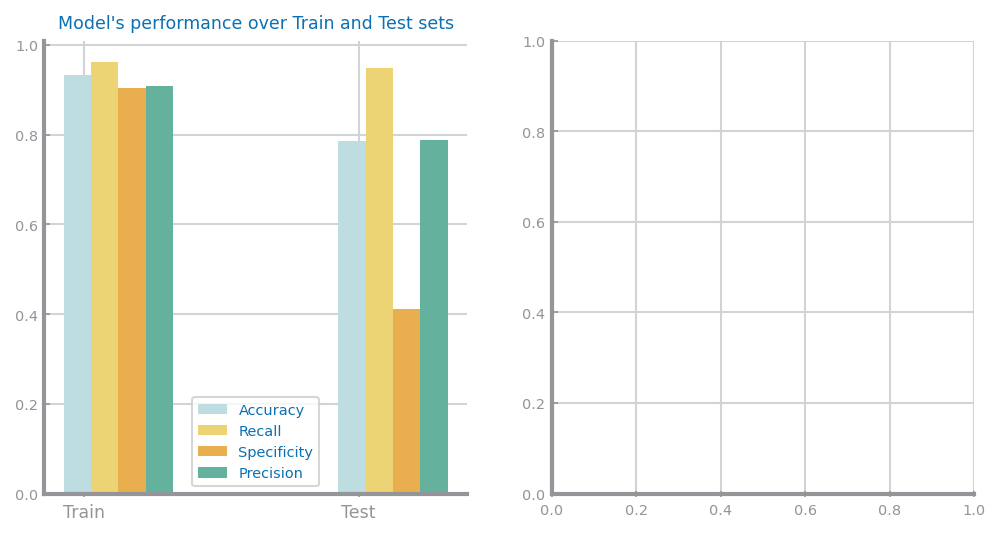

  2%|▏         | 4/180 [00:00<00:06, 28.54it/s]

Results: {'Accuracy': [0.9331210191082803, 0.7857142857142857], 'Recall': [0.9617834394904459, 0.9487179487179487], 'Specificity': [0.9044585987261147, 0.4117647058823529], 'Precision': [0.9096385542168675, 0.7872340425531915]}

------




100%|██████████| 180/180 [00:33<00:00,  5.34it/s]


max_depth, max_features, n_estimators
Index:  2 balancing: None
Accuracy: 0.73
Params: (10, 1, 75)


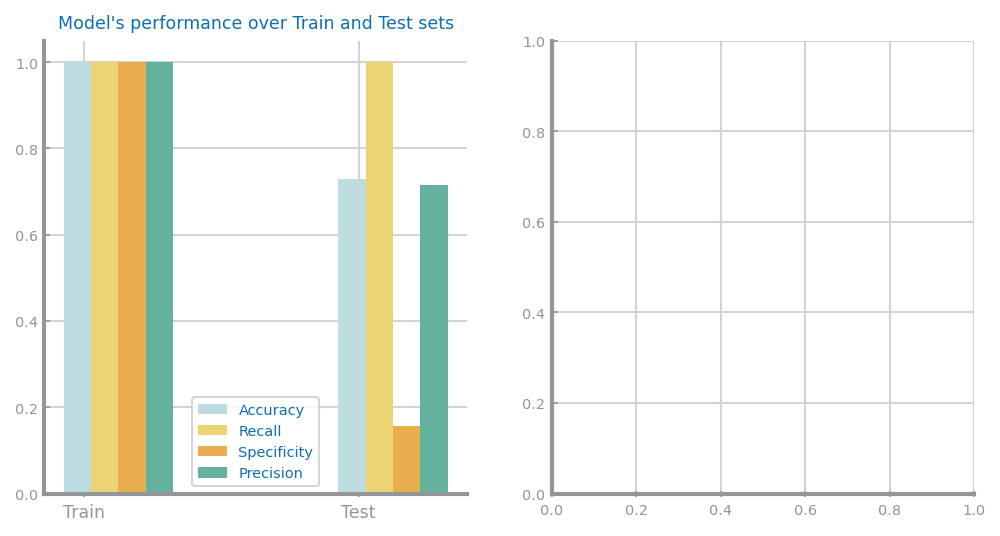

  2%|▏         | 4/180 [00:00<00:05, 31.01it/s]

Results: {'Accuracy': [1.0, 0.7288135593220338], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.15789473684210525], 'Precision': [1.0, 0.7142857142857143]}

------




100%|██████████| 180/180 [00:29<00:00,  6.08it/s]


max_depth, max_features, n_estimators
Index:  2 balancing: undersample
Accuracy: 0.80
Params: (5, 0.1, 100)


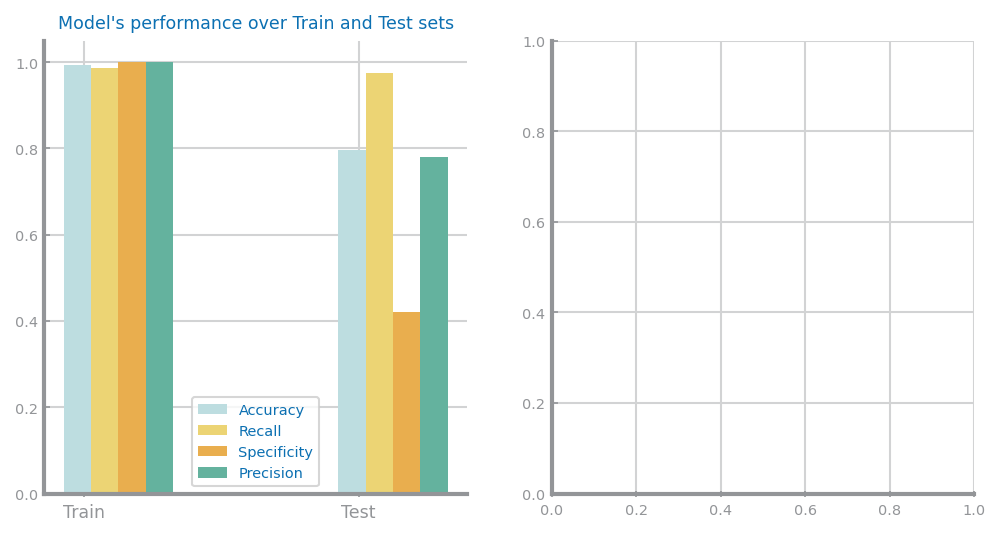

  2%|▏         | 4/180 [00:00<00:05, 29.34it/s]

Results: {'Accuracy': [0.9935064935064936, 0.7966101694915254], 'Recall': [0.987012987012987, 0.975], 'Specificity': [1.0, 0.42105263157894735], 'Precision': [1.0, 0.78]}

------




100%|██████████| 180/180 [00:32<00:00,  5.61it/s]


max_depth, max_features, n_estimators
Index:  2 balancing: oversample
Accuracy: 0.78
Params: (10, 0.1, 25)


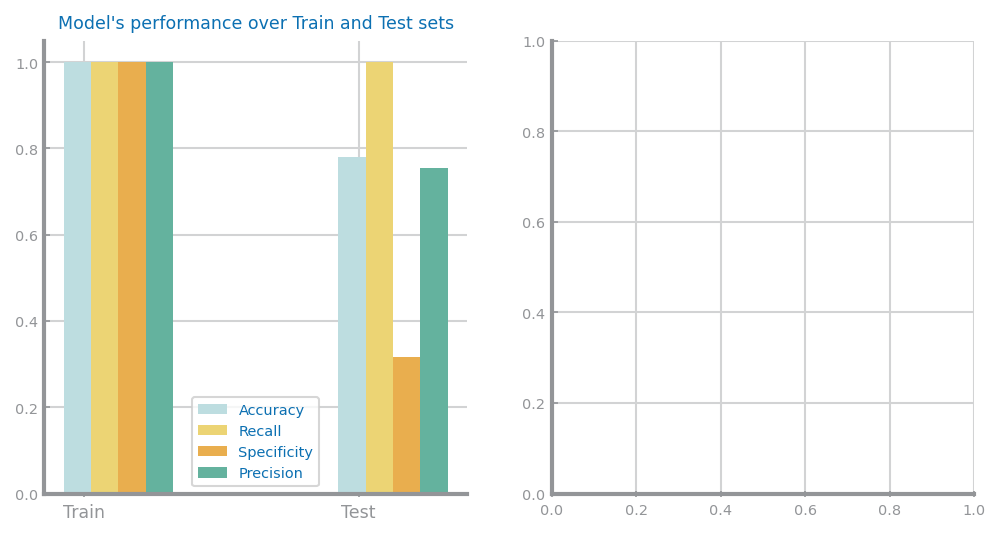

  2%|▏         | 4/180 [00:00<00:06, 28.67it/s]

Results: {'Accuracy': [1.0, 0.7796610169491526], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.3157894736842105], 'Precision': [1.0, 0.7547169811320755]}

------




100%|██████████| 180/180 [00:36<00:00,  4.87it/s]


max_depth, max_features, n_estimators
Index:  2 balancing: smote
Accuracy: 0.80
Params: (5, 1, 25)


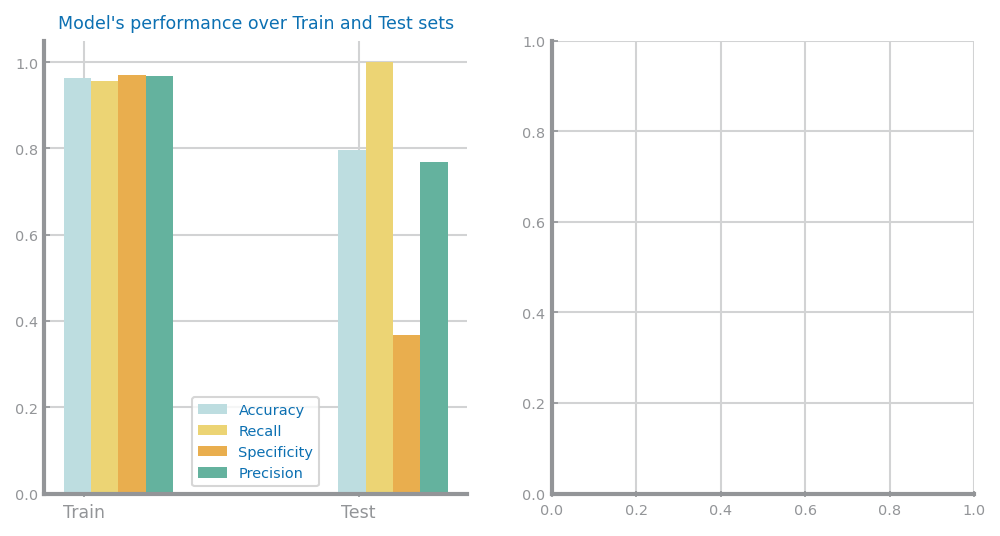

  2%|▏         | 4/180 [00:00<00:06, 27.54it/s]

Results: {'Accuracy': [0.9631901840490797, 0.7966101694915254], 'Recall': [0.9570552147239264, 1.0], 'Specificity': [0.9693251533742331, 0.3684210526315789], 'Precision': [0.968944099378882, 0.7692307692307693]}

------




100%|██████████| 180/180 [00:30<00:00,  5.93it/s]


max_depth, max_features, n_estimators
Index:  3 balancing: None
Accuracy: 0.75
Params: (5, 1, 5)


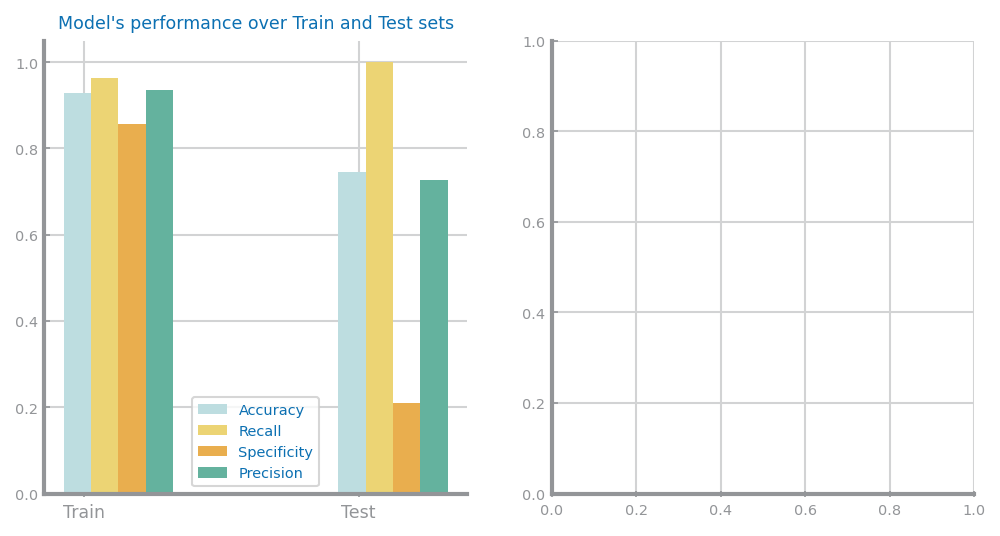

  2%|▏         | 4/180 [00:00<00:05, 32.51it/s]

Results: {'Accuracy': [0.9291666666666667, 0.7457627118644068], 'Recall': [0.9631901840490797, 1.0], 'Specificity': [0.8571428571428571, 0.21052631578947367], 'Precision': [0.9345238095238095, 0.7272727272727273]}

------




100%|██████████| 180/180 [00:28<00:00,  6.21it/s]


max_depth, max_features, n_estimators
Index:  3 balancing: undersample
Accuracy: 0.81
Params: (5, 0.1, 200)


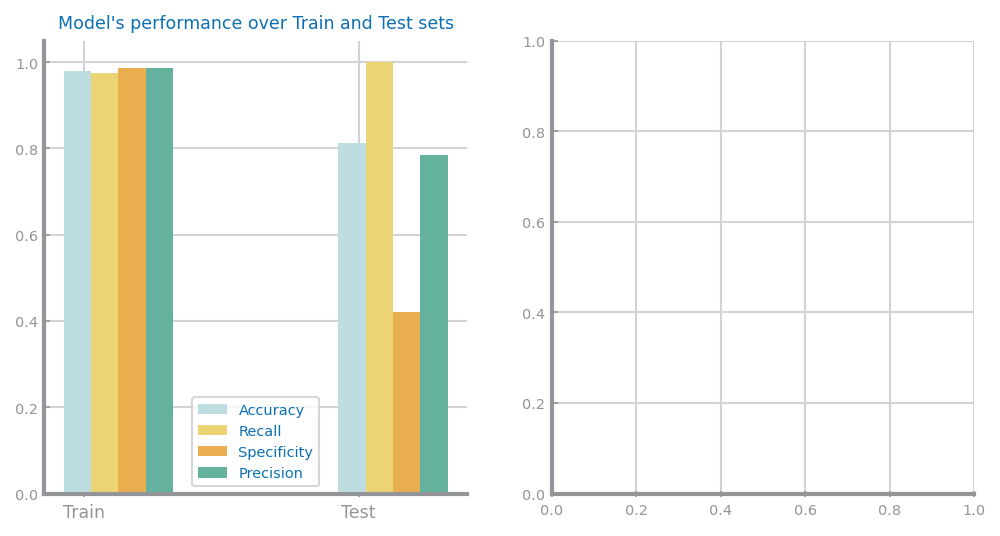

  2%|▏         | 4/180 [00:00<00:05, 30.80it/s]

Results: {'Accuracy': [0.9805194805194806, 0.8135593220338984], 'Recall': [0.974025974025974, 1.0], 'Specificity': [0.987012987012987, 0.42105263157894735], 'Precision': [0.9868421052631579, 0.7843137254901961]}

------




 72%|███████▏  | 129/180 [00:23<00:17,  2.98it/s]

KeyboardInterrupt: 

In [3]:
best = ("", 0)

for i, df in enumerate(dfs):
    for bal in balancings:
        params, results = RandomForestsKFold(df, "DEATH_EVENT", balancing=bal)
        accuracy = results["Accuracy"][1]
        print("Index: ", i, "balancing:", bal)
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Params: {params}')
        plt.pause(0.1)
        print("Results:", results)
        print("\n------\n\n")
        if (accuracy > best[1]):
            if bal == None: bal = "None"
            best = (str(i) + "," + bal, accuracy)
            
print(best)